In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Figura 2.2

Vamos a integrar la ecuación 2.29 con condición inicial $u(0)=1$

\begin{equation}
\dfrac{du(t)}{dt} = -u(t) \:\:\:\:\:(2.29)
\end{equation}


La solución analítica de $u(t)=e^{-t}$
y $h=-u $

#### Hacemos el vector de tiempo y escribimos la función $u(t)$

In [14]:
dt = 0.2
t = np.arange(0,2.5,dt)

u = np.exp(-t)

#### Integramos haciendo la diferenciación por derecha
\begin{equation}
u(t_{n+1}) = u(t_{n}) + h(t_{n})  dt
\end{equation}
\begin{equation}
= u(t_{n}) - u(t_{n})  dt 
\end{equation}
\begin{equation}
= u(t_{n})  (1 - dt)
\end{equation}

In [31]:
u_d = np.zeros(len(u))

u_d[0] = u[0]
#h = -u
for i in range(0,len(u)-1):  
    u_d[i+1] = u_d[i] * (1. - dt)

#### Integramos haciendo la diferenciación por izquierda
\begin{equation}
u(t_{n+1}) = u(t_{n}) + h(t_{n+1})  dt
\end{equation}
\begin{equation}
= u(t_{n}) - u(t_{n+1})  dt 
\end{equation}
\begin{equation}
= u(t_{n}) / (1 + dt)
\end{equation}


In [35]:
u_i = np.zeros(len(u))

u_i[0] = u[0]
#h = -u
for i in range(0,len(u)-1):  
    u_i[i+1] = u_i[i]/(1. + dt)

#### Integramos haciendo la diferenciación centrada
\begin{equation}
u(t_{n+1}) = u(t_{n}) + \dfrac{[h(t_{n}) + h(t_{n+1})]}{2} dt
\end{equation}
\begin{equation}
= u(t_{n}) - \dfrac{[u(t_{n}) + u(t_{n+1})]}{2} dt 
\end{equation}
\begin{equation}
= u(t_{n})\dfrac{2-dt}{2+dt}
\end{equation}

In [45]:
u_c = np.zeros(len(u))

u_c[0] = u[0]
#h = -u
for i in range(0,len(u)-1):  
    u_c[i+1] = u_c[i] * (2. - dt)/(2. + dt)

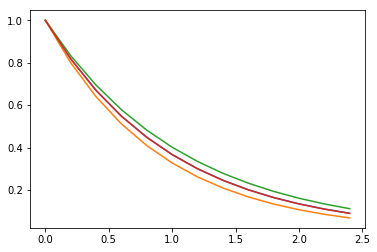

In [38]:
plt.plot(t,u)
plt.plot(t,u_d)
plt.plot(t,u_i)
plt.plot(t,u_c)

#### Calculamos los errores

In [43]:
error_d = (u_d - u)/u
error_i = (u_i - u)/u
error_c = (u_c - u)/u

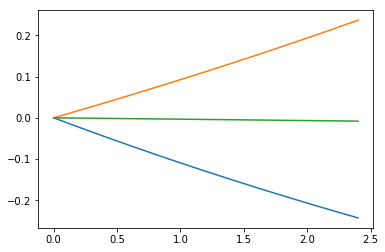

In [44]:
plt.plot(t,error_d)
plt.plot(t,error_i)
plt.plot(t,error_c)

## Calculamos el W para distintos delta t

In [9]:
dt = [0.2, 0.1, 0.05]

#### W en t =1

/home/vcristiani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: numpy.arange
  if sys.path[0] == '':


5.150322693642528


/home/vcristiani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: numpy.arange


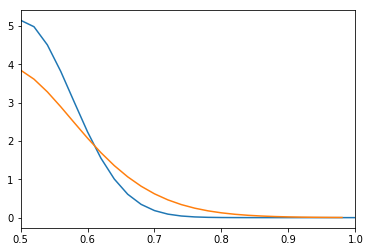

In [10]:
# for k in (0,1,2):
k=0
vd   = 0.001
t0   = 1.
t1   = 3.
dx   = 0.02
aux  = int(2./dt[k])+1

xmin = 0.5 - aux*dx
xmax = 1. + aux*dx

x = frange(xmin, xmax,dx)

n = 1e6

s0 = 0.
s1 = 0.
for i in range(1,int(n)):
    q1 = np.sin(pi*i/2.)
    q2 = np.sin(i*pi*x)
    q3 = np.exp(-vd*t0*(pi*i)**2)
    s0 = s0 + q1*q2*q3
    
    q4 = np.exp(-vd*t1*(pi*i)**2)
    s1 = s1 + q1*q2*q4

w0 = 2*s0
w1 = 2*s1


plt.plot(x,w1)
# plt.plot(x,w0)

'''Aca hacemos la integracion del tiempo'''
a = vd*dt[k]/(dx**2)

u = w0
for j in frange(1,3,dt[k]):
    for i in range(1,len(w0)-1):
        u[i] = u[i] + a * (u[i-1] + u[i+1] -2*u[i])

error = abs(u[aux: -aux-1]-w1[aux: -aux-1])/w1[aux: -aux-1]

x = x[aux:-aux-1]

plt.plot(x,u[aux: -aux-1])
# plt.ylim(0,10)
plt.xlim(0.5,1)

print w1[11]

In [11]:
w1

array([ 9.12388978e-02,  1.83732578e-01,  3.46130077e-01,  6.10013640e-01,
        1.00574246e+00,  1.55124738e+00,  2.23832102e+00,  3.02141734e+00,
        3.81545289e+00,  4.50742501e+00,  4.98147503e+00,  5.15032269e+00,
        4.98147503e+00,  4.50742501e+00,  3.81545289e+00,  3.02141734e+00,
        2.23832102e+00,  1.55124738e+00,  1.00574246e+00,  6.10013640e-01,
        3.46130077e-01,  1.83732578e-01,  9.12388978e-02,  4.23858530e-02,
        1.84208158e-02,  7.48934480e-03,  2.84856298e-03,  1.01357260e-03,
        3.37389010e-04,  1.05064025e-04,  3.06072404e-05,  8.34144563e-06,
        2.12669325e-06,  5.07220833e-07,  1.13037364e-07,  2.27826512e-08,
       -2.55860546e-16, -2.27826520e-08, -1.13037366e-07, -5.07220833e-07,
       -2.12669325e-06, -8.34144563e-06, -3.06072404e-05, -1.05064025e-04,
       -3.37389010e-04, -1.01357260e-03, -2.84856298e-03, -7.48934480e-03])

(0, 1)

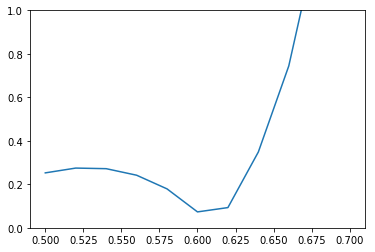

In [127]:

plt.plot(x,abs(u[aux: -aux-15]-w1[aux: -aux-15])/w1[aux: -aux-15])
plt.ylim(0,1)

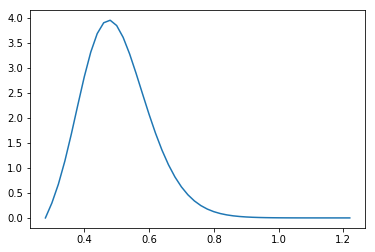

In [18]:
plot(x,u)

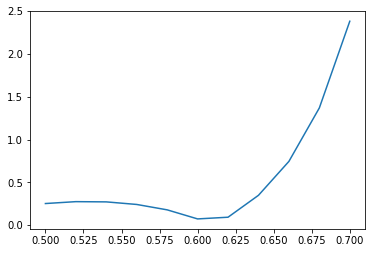

In [34]:
error = abs(u - w)/w
error = error[11:22]
x = x[]
print len(x)
plt.plot(x,error)
# plt.xlim(0.5,0.9)
